# Regression Modeling in People Analytics
https://peopleanalytics-regression-book.org/index.html

## Exercises

In [120]:
import peopleanalyticsdata as pad
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Chapter 3

#### Data exercises
https://peopleanalytics-regression-book.org/found-stats.html#learning-exercises-1

In [3]:
# 1
pad.list_sets()

['charity_donation',
 'employee_survey',
 'health_insurance',
 'job_retention',
 'managers',
 'politics_survey',
 'salespeople',
 'soccer',
 'sociological_data',
 'speed_dating',
 'ugtests',
 'employee_performance',
 'learning',
 'graduates',
 'promotion',
 'recruiting']

In [6]:
df_charity = pad.charity_donation()
df_charity.head()

,n_donations,total_donations,time_donating,recent_donation,last_donation,gender,reside,age
0,2,310,27,0,4,M,Urban Domestic,29
1,3,1200,22,0,6,M,Rural Domestic,41
2,3,1200,37,1,11,M,Urban Domestic,77
3,2,760,19,1,1,F,Overseas,66
4,6,2540,37,0,11,M,Urban Domestic,26


In [7]:
df_charity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 8 columns):
n_donations        354 non-null int64
total_donations    354 non-null int64
time_donating      354 non-null int64
recent_donation    354 non-null int64
last_donation      354 non-null int64
gender             354 non-null object
reside             354 non-null object
age                354 non-null int64
dtypes: int64(6), object(2)
memory usage: 22.2+ KB


In [8]:
df_charity.describe()

,n_donations,total_donations,time_donating,recent_donation,last_donation,age
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,5.751412,2350.141243,33.923729,0.234463,6.067797,46.997175
std,5.445097,2496.578561,13.600006,0.424263,3.792184,15.614604
min,2.000000,310.000000,15.000000,0.000000,1.000000,19.000000
25%,2.000000,760.000000,23.000000,0.000000,4.000000,33.000000
50%,4.000000,1650.000000,30.000000,0.000000,6.000000,47.000000
75%,7.000000,2990.000000,43.000000,0.000000,11.000000,57.000000
max,44.000000,19530.000000,70.000000,1.000000,12.000000,85.000000


In [10]:
#1 calcualte mena of 'total_donations' from the data set
df_charity['total_donations'].mean()
# matches results in 'describe()'

2350.141242937853

In [15]:
#2 calculate the sampe variance from 'total_donation' and convert this to a popluation variance
print('Sample variance: {:.0f}'.format(df_charity['total_donations'].var()))
print('Population variance: {:.0f}'.format(df_charity['total_donations'].var(ddof=0)))

Sample variance: 6232905
Population variance: 6215297


In [24]:
#3 calculate the sample standard deviation from 'total_donations' and verify that it is the same as square root of the sample variance
print('Sample standard deviation: {:.0f}'.format(df_charity['total_donations'].std()))
df_charity['total_donations'].std() == df_charity['total_donations'].var()**0.5

Sample standard deviation: 2497


True

In [37]:
#4 Calcualte the sample correlation between 'total_donation' and 'time_donating'
print('Correlation: {:0f}'.format(df_charity[['total_donations','time_donating']].corr()['total_donations']['time_donating']))

Correlation: 0.616484


In [44]:
# By using an appropriate hypothesis test, determine if these two variables are independent in the overall population
from scipy import stats
print(stats.pearsonr(df_charity['total_donations'],df_charity['time_donating']))
print('There is a significant correlation (low p-value) between both variables meaning they are not independent')

(0.6164844637462865, 1.9536681202245572e-38)
There is a significant correlation (low p-value) between both variables meaning they are not independent


In [95]:
#5 Calcualte the mean and the standard error of the mean for the first 20 entries of 'total_donations'
n = 20
mean = df_charity['total_donations'][:n].mean()
std_error = df_charity['total_donations'][:n].std() / len(df_charity['total_donations'][:n])**0.5
# df_charity['total_donations'][:n].std() / np.sqrt(np.size(df_charity['total_donations'][:n]))

In [96]:
alpha = 0.05
t = stats.t.ppf(1 - alpha / 2, df=len(df_charity['total_donations'][:n])-1)
# to calculate upper and lower bounds

In [97]:
print('Probability of 0.95 for n=',n)
print('Lower bound: {:.0f}'.format(mean - t*std_error))
print('Mean: {:.0f}, Standard Error: {:.0f}'.format(mean,std_error))
print('Upper bound: {:.0f}'.format(mean + t*std_error))

Probability of 0.95 for n= 20
Lower bound: 1192
Mean: 1851, Standard Error: 315
Upper bound: 2510


In [98]:
#6 Calcualte the mean and the standard error of the mean for the first 50 entries of 'total_donations'
n = 50
mean = df_charity['total_donations'][:n].mean()
std_error = df_charity['total_donations'][:n].std() / len(df_charity['total_donations'][:n])**0.5
# df_charity['total_donations'][:n].std() / np.sqrt(np.size(df_charity['total_donations'][:n]))

In [99]:
alpha = 0.05
t = stats.t.ppf(1 - alpha / 2, df=len(df_charity['total_donations'][:n])-1)
# to calculate upper and lower bounds

In [100]:
print('Probability of 0.95 for n=',n)
print('Lower bound: {:.0f}'.format(mean - t*std_error))
print('Mean: {:.0f}, Standard Error: {:.0f}'.format(mean,std_error))
print('Upper bound: {:.0f}'.format(mean + t*std_error))

Probability of 0.95 for n= 50
Lower bound: 1543
Mean: 2026, Standard Error: 241
Upper bound: 2510


In [169]:
#7 By using an appropriate hypothesis test, determine if the mean age of those who made a recent donation is different from those who did not
recent = df_charity[df_charity['recent_donation'] == 1]['age']
print('Mean age for recent donations: {:.0f}'.format(recent.mean()))
non_recent = df_charity[df_charity['recent_donation'] == 0]['age']
print('Mean age for non recent donations: {:.0f}'.format(non_recent.mean()))

Mean age for recent donations: 63
Mean age for non recent donations: 42


In [170]:
print(stats.ttest_ind(recent, non_recent, equal_var=False))
print('There is a significant difference t-value is 10 standard erros')

Ttest_indResult(statistic=10.207144596800273, pvalue=2.0690487990235852e-17)
There is a significant difference t-value is 10 standard erros


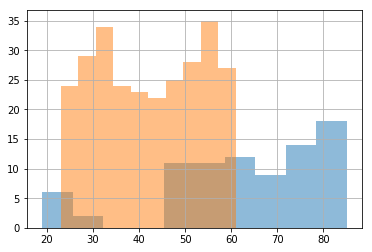

In [171]:
recent.hist(alpha=0.5)
non_recent.hist(alpha=0.5)
plt.show()

In [172]:
#8 By using an appropriate hypothesis test, determine if there is a difference in whether or not a recent donation was made according to where people reside
contingency = pd.crosstab(df_charity['recent_donation'], df_charity['reside'])
print(contingency)

reside           Overseas  Rural Domestic  Urban Domestic
recent_donation                                          
0                     101              88              82
1                      14              45              24


In [173]:
# perform chi-square test
stats.chi2_contingency(contingency)

(16.17593180925381,
 0.0003072140246341394,
 2,
 array([[ 88.03672316, 101.81638418,  81.14689266],
        [ 26.96327684,  31.18361582,  24.85310734]]))

In [174]:
print('We can reject NULL hypothesis and connfirm there is a difference in the distribution of recent donation based on reside. From looking at the data Rural Domestic seems to be more generous')

We can reject NULL hypothesis and connfirm there is a difference in the distribution of recent donation based on reside. From looking at the data Rural Domestic seems to be more generous


In [175]:
#9 Extension: By using an appropriate hypothesis test, determine if the age of those who have recently donated is at least 10 years older than those who have not recently donated in the population.
# reuse data from #7
age_diff = 10
recent_age = df_charity[df_charity['recent_donation'] == 1]['age']
print('Mean age for recent donations: {:.0f}'.format(recent_age.mean()))
non_recent_age = df_charity[df_charity['recent_donation'] == 0]['age']+age_diff
print('Mean age for non recent donations: {:.0f}'.format(non_recent_age.mean()))

Mean age for recent donations: 63
Mean age for non recent donations: 52


In [176]:
print(stats.ttest_ind(recent_age, non_recent_age, equal_var=False))
print('There is a significant difference t-value is 5 standard erros')

Ttest_indResult(statistic=5.2268021732859635, pvalue=8.806189445669701e-07)
There is a significant difference t-value is 5 standard erros


In [177]:
import statsmodels.api as sm
sm.stats.ttest_ind(recent, non_recent, usevar='unequal', alternative='larger', value=10)

(5.2268021732859635, 4.403094722834861e-07, 105.15057759463703)

In [162]:
#10 Extension: By using an appropriate hypothesis test, determine if the average donation amount is at least 10 dollars higher for those who recently donated versus those who did not. Retest for 20 dollars higher.
# reuse data from #9
donations_diff = 20
recent_don = df_charity[df_charity['recent_donation'] == 1]['total_donations']
print('Mean age for recent donations: {:.0f}'.format(recent_don.mean()))
non_recent_don = df_charity[df_charity['recent_donation'] == 0]['total_donations']+donations_diff
print('Mean age for non recent donations: {:.0f}'.format(non_recent_don.mean()))

Mean age for recent donations: 2948
Mean age for non recent donations: 2187


In [163]:
print(stats.ttest_ind(recent_don, non_recent_don, equal_var=False))
print('There is a significant difference t-value is 5 standard erros')

Ttest_indResult(statistic=2.3804341922671233, pvalue=0.0187402428326938)
There is a significant difference t-value is 5 standard erros


### Chapter 4

#### Exercises
https://peopleanalytics-regression-book.org/linear-reg-ols.html#extending-multiple-linear-regression

In [178]:
import peopleanalyticsdata as pad

In [180]:
df_socio = pad.sociological_data()
df_socio.head()

,annual_income_ppp,average_wk_hrs,education_months,region,job_type,gender,family_size,work_distance,languages
0,66417.0,50.0,157.0,Southern Asia,Unskilled,F,5.0,3.0,1.0
1,55124.0,50.0,156.0,Southern Asia,Unskilled,F,5.0,0.0,1.0
2,55124.0,50.0,155.0,Southern Asia,Unskilled,F,5.0,3.0,1.0
3,54238.0,50.0,154.0,Southern Asia,Unskilled,F,5.0,0.0,1.0
4,53573.0,50.0,150.0,Southern Asia,Unskilled,F,4.0,0.0,1.0


In [182]:
#1 Identify the extent to which missing data is an issue
df_socio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 9 columns):
annual_income_ppp    2608 non-null float64
average_wk_hrs       2584 non-null float64
education_months     2599 non-null float64
region               2618 non-null object
job_type             2618 non-null object
gender               2595 non-null object
family_size          2427 non-null float64
work_distance        2206 non-null float64
languages            2206 non-null float64
dtypes: float64(6), object(3)
memory usage: 184.2+ KB


In [186]:
df_socio.isnull().sum()
# many NULL values for Work_distance and Languages especially

annual_income_ppp     10
average_wk_hrs        34
education_months      19
region                 0
job_type               0
gender                23
family_size          191
work_distance        412
languages            412
dtype: int64

In [190]:
#2 Determine if the data types are appropriate for analysis
df_socio.head()
# would need to convert 'region','job_type' and 'gender' to dummies

,annual_income_ppp,average_wk_hrs,education_months,region,job_type,gender,family_size,work_distance,languages
0,66417.0,50.0,157.0,Southern Asia,Unskilled,F,5.0,3.0,1.0
1,55124.0,50.0,156.0,Southern Asia,Unskilled,F,5.0,0.0,1.0
2,55124.0,50.0,155.0,Southern Asia,Unskilled,F,5.0,3.0,1.0
3,54238.0,50.0,154.0,Southern Asia,Unskilled,F,5.0,0.0,1.0
4,53573.0,50.0,150.0,Southern Asia,Unskilled,F,4.0,0.0,1.0


In [195]:
#3 Using a correlation matrix, pairplot or alternative method, identify whether collinearity is present in the data
df_socio.corr()
# high correlation between 'eduction_months' and 'annual_income_ppp'

,annual_income_ppp,average_wk_hrs,education_months,family_size,work_distance,languages
annual_income_ppp,1.000000,-0.574919,0.760944,0.184512,-0.024283,-0.020435
average_wk_hrs,-0.574919,1.000000,-0.547691,-0.217679,0.079346,0.062988
education_months,0.760944,-0.547691,1.000000,0.239995,-0.038707,-0.028354
family_size,0.184512,-0.217679,0.239995,1.000000,-0.090714,-0.059354
work_distance,-0.024283,0.079346,-0.038707,-0.090714,1.000000,0.936186
languages,-0.020435,0.062988,-0.028354,-0.059354,0.936186,1.000000


In [200]:
#4 Identify and discuss anything esle intersting that you see in the data
import seaborn as sns
df_socio.describe()
# metrics where 75% percentile is very far from max can be a sign of outliers. Would be worth checking

,annual_income_ppp,average_wk_hrs,education_months,family_size,work_distance,languages
count,2608.000000,2584.000000,2599.000000,2427.000000,2206.000000,2206.000000
mean,76040.057132,44.190402,179.317815,3.259580,0.985041,1.018132
std,20981.738753,5.856006,39.693201,1.470578,5.020615,0.205673
min,2863.000000,30.000000,40.000000,0.000000,0.000000,1.000000
25%,62653.000000,39.000000,157.000000,2.000000,0.000000,1.000000
50%,82140.000000,43.000000,184.000000,3.000000,0.000000,1.000000
75%,90112.000000,50.000000,207.000000,4.000000,1.000000,1.000000
max,119564.000000,55.000000,280.000000,10.000000,105.000000,5.000000


**Prepare to build a linear regression model to explain the variation in 'annual_income_ppp' using the other data in the data set**

In [260]:
#5 Are there any fields which you believe should not be included in the model? If so, why?
# I will remove 'work_distance' and 'languages' fields as they have over 400 Null values as well as low correlation (~0.02) with output variable
df_socio_clean = df_socio.drop(columns=['work_distance','languages'])

In [261]:
# I am thinking of removing entries with null values for 'gender'
df_socio_clean.isnull().sum()

annual_income_ppp     10
average_wk_hrs        34
education_months      19
region                 0
job_type               0
gender                23
family_size          191
dtype: int64

In [262]:
# I will also removed rows where we don't have an output variable or where gender is null
df_socio_clean = df_socio_clean[~(df_socio_clean['annual_income_ppp'].isnull() | df_socio_clean['gender'].isnull())]

In [263]:
print('Shape before cleaning:',df_socio.shape)
print('Shape after cleaning:',df_socio_clean.shape)

Shape before cleaning: (2618, 9)
Shape after cleaning: (2592, 7)


In [264]:
#6 Would you consider imputing missing data for some or all fields where it is an issue? If so, what might be some simple ways to impute the missing data?

In [265]:
df_socio_clean.isnull().sum()

annual_income_ppp      0
average_wk_hrs        32
education_months       0
region                 0
job_type               0
gender                 0
family_size          175
dtype: int64

In [266]:
df_socio_clean['average_wk_hrs'].fillna(df_socio_clean['average_wk_hrs'].mean(), inplace=True)
#df_socio_clean['education_months'].fillna(df_socio_clean['education_months'].mean(), inplace=True)
df_socio_clean['family_size'].fillna(df_socio_clean['family_size'].mean(), inplace=True)

In [267]:
df_socio_clean.isnull().sum()

annual_income_ppp    0
average_wk_hrs       0
education_months     0
region               0
job_type             0
gender               0
family_size          0
dtype: int64

In [271]:
#7 Which variables are categorical? Convert these vriables to dummy variables using a convenient function or using your own approach
categorical = ['region','job_type','gender']
df_socio_clean.head()

,annual_income_ppp,average_wk_hrs,education_months,region,job_type,gender,family_size
0,66417.0,50.0,157.0,Southern Asia,Unskilled,F,5.0
1,55124.0,50.0,156.0,Southern Asia,Unskilled,F,5.0
2,55124.0,50.0,155.0,Southern Asia,Unskilled,F,5.0
3,54238.0,50.0,154.0,Southern Asia,Unskilled,F,5.0
4,53573.0,50.0,150.0,Southern Asia,Unskilled,F,4.0


In [273]:
df_socio_final = pd.get_dummies(data=df_socio_clean, columns=categorical)

**Run and interpret the model. For convenience, and to avoid long formula strings, you can use the formula notation annual_income_ppp ~ . which means ‘regress annual_income against everything else’‍. You can also remove fields this way, for example annual_income_ppp ~ . - family_size.**

In [276]:
X = df_socio_final.drop(columns='annual_income_ppp').values
y = df_socio_final['annual_income_ppp'].values

In [287]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print('LinearRegression R2 Score:',lr.score(X,y))

LinearRegression R2 Score: 0.7994321680892689


In [301]:
import statsmodels.formula.api as smf
model = smf.ols(formula = "annual_income_ppp ~ average_wk_hrs + education_months + region + job_type + gender + family_size" ,data=df_socio_clean)

In [302]:
socio_model = model.fit()

In [304]:
socio_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      annual_income_ppp   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     487.8
Date:                Tue, 17 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:53:01   Log-Likelihood:                -27374.
No. Observations:                2592   AIC:                         5.479e+04
Df Residuals:                    2570   BIC:                         5.492e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                  6.271e+04   3434.391     18.260      0.000     5.6e+04    6.94e+04
region[T.Central Asia]                    -1.017e+04   2214.307     -4.593      0.000   -1.45e+04   -5827.240
region[T.Eastern Asia]                     -164.5549   2301.073     -0.072      0.943   -4676.700    4347.590
region[T.Eastern Europe]                  -9093.4941   1948.383     -4.667      0.000   -1.29e+04   -5272.934
region[T.Latin America and the Caribbean]  1310.1174   1963.690      0.667      0.505   -2540.459    5160.693
region[T.Melanesia]                       -4581.0527   2282.286     -2.007      0.045   -9056.360    -105.746
region[T.Micronesia]                      -1.021e+04   2572.132     -3.971      0.000   -1.53e+04   -5170.348
region[T.Northern Africa]                 -1555.5162   2162.342     -0.719      0.472   -5795.625    2684.593
region[T.Northern America]                 1.387e+04   2989.959      4.639      0.000    8006.259    1.97e+04
region[T.Northern Europe]                  -399.7684   1856.566     -0.215      0.830   -4040.285    3240.748
region[T.Polynesia]                       -1770.7846   2531.338     -0.700      0.484   -6734.453    3192.884
region[T.South-eastern Asia]              -3087.5929   2122.084     -1.455      0.146   -7248.761    1073.575
region[T.Southern Asia]                   -3534.5128   2187.467     -1.616      0.106   -7823.889     754.864
region[T.Southern Europe]                  4355.5294   1892.866      2.301      0.021     643.831    8067.227
region[T.Sub-Saharan Africa]               -2.07e+04   2056.938    -10.066      0.000   -2.47e+04   -1.67e+04
region[T.Western Asia]                     2391.1251   1990.945      1.201      0.230   -1512.893    6295.143
region[T.Western Europe]                   6460.2103   1921.187      3.363      0.001    2692.979    1.02e+04
job_type[T.Unskilled]                     -8127.8479    802.173    -10.132      0.000   -9700.819   -6554.877
gender[T.M]                                9940.6484    659.539     15.072      0.000    8647.366    1.12e+04
average_wk_hrs                             -113.4808     48.826     -2.324      0.020    -209.222     -17.739
education_months                            131.8456      8.487     15.535      0.000     115.203     148.488
family_size                                 -23.9187    148.607     -0.161      0.872    -315.320     267.483
==============================================================================
Omnibus:                      139.230   Durbin-Watson:                   0.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              504.455
Skew:                          -0.116   Prob(JB):                    2.88e-110
Kurtosis:        

In [305]:
#8 Determine what variables are significant predictors of annual income and what is the effect of each on the outcome
# familiy-size and average_wk_hrs seem to have non-significant impact on ouput => won't use in model
# eduction_months are positive correlation to output

In [342]:
#9 Determine the overall fit of the model.
# 0.79 including all features (even non significant ones)
df_socio_finalb = df_socio_final.drop(columns=['family_size','average_wk_hrs'])
X_b = df_socio_finalb.drop(columns='annual_income_ppp').values
y_b = df_socio_finalb['annual_income_ppp'].values
lr2 = LinearRegression()
lr2.fit(X_b, y_b)
print('Final fit of the model is: {:.2f}'.format(lr2.score(X_b, y_b)))

Final fit of the model is: 0.80


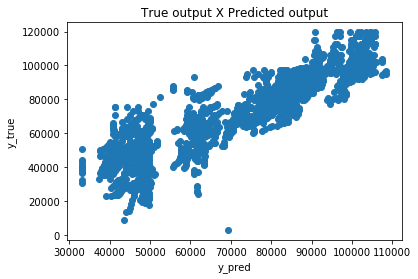

In [343]:
#10 Do some simple analysis on the residuals of the model to determine if the model is safe to interpret
y_true = y_b
y_pred = lr2.predict(X_b)
plt.scatter(x=y_pred, y=y_true)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('True output X Predicted output')
plt.show()

In [344]:
# residuals = y_pred - y_true
residuals = y_pred - y_true

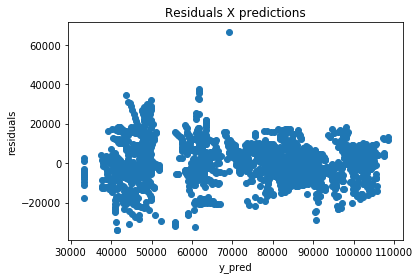

In [345]:
plt.scatter(x=y_pred, y=residuals)
plt.xlabel('y_pred')
plt.ylabel('residuals')
plt.title('Residuals X predictions')
plt.show()
# the closer to a normal distribution the better sign that no biases

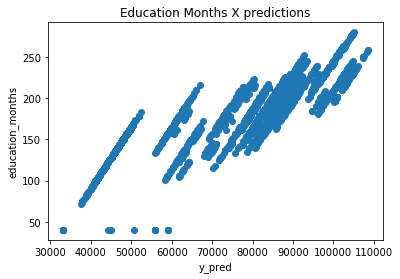

In [349]:
plt.scatter(x=y_pred, y=df_socio_finalb['education_months'])
plt.xlabel('y_pred')
plt.ylabel('education_months')
plt.title('Education Months X predictions')
plt.show()

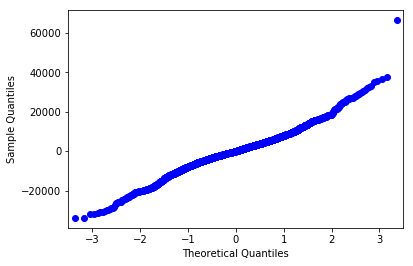

In [372]:
# Quantile-Quantile plot
import numpy as np
import statsmodels.api as sm
import pylab as py
sm.qqplot(residuals)
plt.show()

In [374]:
#11 Experiment with improving the model fit through possible interaction terms or non-linear extensions
df_socio_finalb.head()

,annual_income_ppp,education_months,region_Australia and New Zealand,region_Central Asia,region_Eastern Asia,region_Eastern Europe,region_Latin America and the Caribbean,region_Melanesia,region_Micronesia,region_Northern Africa,...,region_South-eastern Asia,region_Southern Asia,region_Southern Europe,region_Sub-Saharan Africa,region_Western Asia,region_Western Europe,job_type_Skilled,job_type_Unskilled,gender_F,gender_M
0,66417.0,157.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,55124.0,156.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,55124.0,155.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,54238.0,154.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,53573.0,150.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [388]:
# interaction terms
df_socio_finalc = df_socio_final
df_socio_finalc['hrs_edu'] = df_socio_final['average_wk_hrs']*df_socio_final['education_months']
df_socio_finalc['hrs_edu'] = df_socio_final['average_wk_hrs']*df_socio_final['education_months']
df_socio_finalc = df_socio_finalc.drop(columns=['average_wk_hrs','family_size'])
X_c = df_socio_finalc.drop(columns='annual_income_ppp').values
y_c = df_socio_finalc['annual_income_ppp'].values
lr3 = LinearRegression()
lr3.fit(X_c, y_c)
lr3.score(X_c, y_c)
# almost no improvements

0.7992882249761246

In [403]:
# non-linear extensions
df_socio_finald = df_socio_final
df_socio_finald['edu_2'] = df_socio_final['education_months']**2
#df_socio_finald['hrs_2'] = df_socio_final['average_wk_hrs']**2
#df_socio_finald['fam_2'] = df_socio_final['family_size']**2
df_socio_finald = df_socio_finald.drop(columns=['average_wk_hrs','family_size'])
X_d = df_socio_finald.drop(columns='annual_income_ppp').values
y_d = df_socio_finald['annual_income_ppp'].values
lr4 = LinearRegression()
lr4.fit(X_d, y_d)
lr4.score(X_d, y_d)
# small improvements

0.8121486689396833

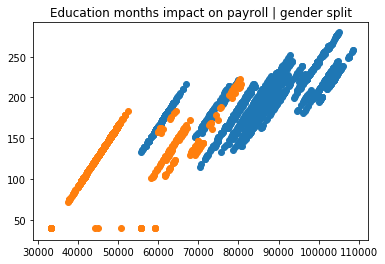

In [444]:
#12 Comment on your results. Did anything in the results surprise you? If so, what might be posisble explanations for this?
# didn't find anything surprising (except what we would know of already of issues if gender equality for example)
X_male = df_socio_finalb[df_socio_finalb['gender_M'] == 1].drop(columns='annual_income_ppp').values
y_male = lr2.predict(X_male)
X_female = df_socio_finalb[df_socio_finalb['gender_M'] == 0].drop(columns='annual_income_ppp').values
y_female = lr2.predict(X_female)
plt.scatter(y_male, df_socio_finalb[df_socio_finalb['gender_M'] == 1]['education_months'])
plt.scatter(y_female, df_socio_finalb[df_socio_finalb['gender_M'] == 0]['education_months'])
plt.title('Education months impact on payroll | gender split')
plt.show()
# with similar eduction female still get paid less than males

In [427]:
df_socio_clean['region'].unique()

array(['Southern Asia', 'Southern Europe', 'Northern Africa',
       'Sub-Saharan Africa', 'Latin America and the Caribbean',
       'Western Asia', 'Australia and New Zealand', 'Western Europe',
       'Eastern Europe', 'South-eastern Asia', 'Northern America',
       'Eastern Asia', 'Northern Europe', 'Melanesia', 'Central Asia',
       'Micronesia', 'Polynesia'], dtype=object)

In [433]:
df_socio_clean[df_socio_clean['region'] == 'Southern Asia']['annual_income_ppp'].head()

0    66417.0
1    55124.0
2    55124.0
3    54238.0
4    53573.0
Name: annual_income_ppp, dtype: float64

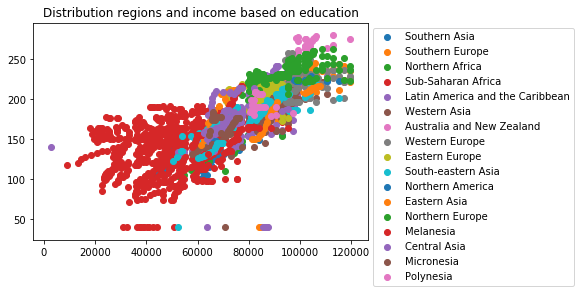

In [441]:
for r in df_socio_clean['region'].unique():
    plt.scatter(x=df_socio_clean[df_socio_clean['region'] == r]['annual_income_ppp'], y=df_socio_clean[df_socio_clean['region'] == r]['education_months'], label=r)
plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.title('Distribution regions and income based on education')
plt.show()

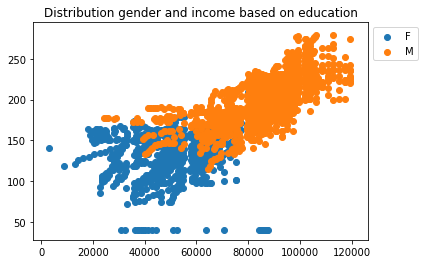

In [443]:
for g in df_socio_clean['gender'].unique():
    plt.scatter(x=df_socio_clean[df_socio_clean['gender'] == g]['annual_income_ppp'], y=df_socio_clean[df_socio_clean['gender'] == g]['education_months'], label=g)
plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.title('Distribution gender and income based on education')
plt.show()

In [445]:
#13 Explain why you would or would not be combfortable using a mdodel like this in a predictive setting - for example to help employers determine the right pay for employess.
# it could be use to predict right pay of female given same input features as males
# there would be some concerns if we were ot use this as gender is sensitive information as well as family size, etc..

### Chapter 5: Binomial Logistic Regression for Binary Outcomes

A nature preservation charity has asked you to analyze some data to help them understand the features of those members of the public who donated in a given month. Load the charity_donation data set via the peopleanalyticsdata package. 

It contains the following data:
* n_donations: The total number of times the individual donated previous to the month being studied.
* total_donations: The total amount of money donated by the individual previous to the month being studied
* time_donating: The number of months between the first donation and the month being studied
* recent_donation: Whether or not the individual donated in the month being studied
* last_donation: The number of months between the most recent previous donation and the month being studied
* gender: The gender of the individual
* reside: Whether the person resides in an Urban or Rural Domestic location or Overseas
* age: The age of the individual


In [36]:
import peopleanalyticsdata as pad
import pandas as pd
df_charity = pad.charity_donation()
df_charity.shape

(354, 8)

In [37]:
#1 View the data and obtain statistical summaries. Ensure data types are appropriate and there is no missing data. Determine the outcome and input variables
df_charity.info()
# correct data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 8 columns):
n_donations        354 non-null int64
total_donations    354 non-null int64
time_donating      354 non-null int64
recent_donation    354 non-null int64
last_donation      354 non-null int64
gender             354 non-null object
reside             354 non-null object
age                354 non-null int64
dtypes: int64(6), object(2)
memory usage: 22.2+ KB


In [38]:
df_charity.isnull().sum().sum()
# no null values

0

In [39]:
df_charity.describe()
# outcome variable would be 'recent_donation'. We want to understand what infuences the odds of a donator to donate in this month
# input variables will be all other significant variables

,n_donations,total_donations,time_donating,recent_donation,last_donation,age
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,5.751412,2350.141243,33.923729,0.234463,6.067797,46.997175
std,5.445097,2496.578561,13.600006,0.424263,3.792184,15.614604
min,2.000000,310.000000,15.000000,0.000000,1.000000,19.000000
25%,2.000000,760.000000,23.000000,0.000000,4.000000,33.000000
50%,4.000000,1650.000000,30.000000,0.000000,6.000000,47.000000
75%,7.000000,2990.000000,43.000000,0.000000,11.000000,57.000000
max,44.000000,19530.000000,70.000000,1.000000,12.000000,85.000000


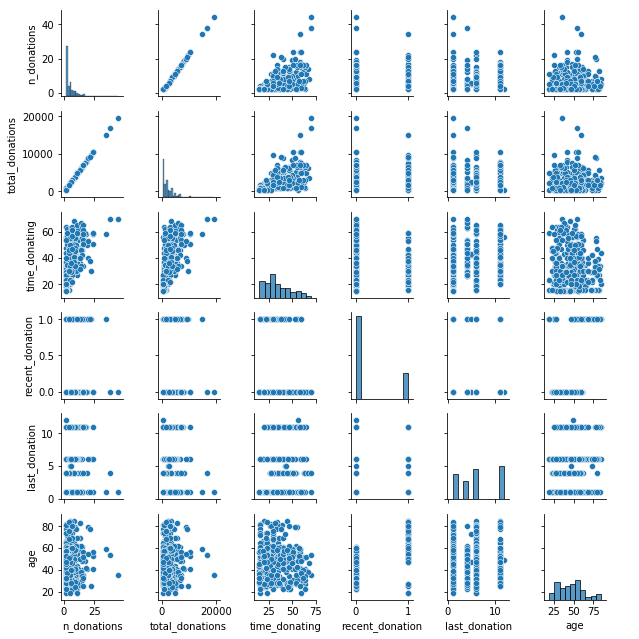

In [40]:
#2 Using a pairplot or by plotting or correlating selected fields, try to hypothesize which variables may be significant in explaining who recently donated.
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_charity, height=1.5)
plt.show()
# it seems 'age' might be the most significant variable when looking at the 'recent_donatoin' row this is the variable with the more clear different between positive and negative outcome

In [70]:
df_charity.corr()

,n_donations,total_donations,time_donating,recent_donation,last_donation,age
n_donations,1.000000,0.997827,0.600566,0.127081,-0.131847,0.050570
total_donations,0.997827,1.000000,0.616484,0.132785,-0.132986,0.051601
time_donating,0.600566,0.616484,1.000000,-0.142709,0.065630,-0.091300
recent_donation,0.127081,0.132785,-0.142709,1.000000,-0.221200,0.556864
last_donation,-0.131847,-0.132986,0.065630,-0.221200,1.000000,-0.043915
age,0.050570,0.051601,-0.091300,0.556864,-0.043915,1.000000


In [54]:
#3 Run a binomial logistic regression model using all input fields. Determine which input variables have a significant effect on the outcome and the direction of that effect
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.glm(formula = "recent_donation ~ n_donations + total_donations + time_donating + last_donation + age + reside + gender", data=df_charity, family = sm.families.Binomial())
charity_model = model.fit()
charity_model.summary()
# only one catgory in 'reside' is non-significant but will keep it as a categorical variable
# remove 'n_donations' as too high correlation with 'total_donations' and higher p_value

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        recent_donation   No. Observations:                  354
Model:                            GLM   Df Residuals:                      345
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -102.87
Date:                Wed, 18 Aug 2021   Deviance:                       205.75
Time:                        11:04:24   Pearson chi2:                     460.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -3.5952      1.019     -3.528      0.000      -5.593      -1.598
reside[T.Rural Domestic]     1.3530      0.457      2.960      0.003       0.457       2.249
reside[T.Urban Domestic]     0.4807      0.488      0.986      0.324      -0.475       1.437
gender[T.M]                 -0.8351      0.374     -2.235      0.025      -1.567      -0.103
n_donations                 -1.4357      0.569     -2.524      0.012      -2.551      -0.321
total_donations              0.0035      0.001      2.780      0.005       0.001       0.006
time_donating               -0.1001      0.024     -4.243      0.000      -0.146      -0.054
last_donation               -0.1260      0.051     -2.485      0.013      -0.225      -0.027
age                          0.1111      0.015      7.571      0.000       0.082       0.140
============================================================================================
"""

In [55]:
#6 Experiment with model parsimony by reducing input variables that do not have a significant impact on the outcome. Decide on the most parsimonious model.
df_charity.head()

,n_donations,total_donations,time_donating,recent_donation,last_donation,gender,reside,age
0,2,310,27,0,4,M,Urban Domestic,29
1,3,1200,22,0,6,M,Rural Domestic,41
2,3,1200,37,1,11,M,Urban Domestic,77
3,2,760,19,1,1,F,Overseas,66
4,6,2540,37,0,11,M,Urban Domestic,26


In [56]:
df_charity_dummies = pd.get_dummies(data=df_charity.drop(columns='n_donations'), columns=['gender','reside'])

In [57]:
y = df_charity_dummies['recent_donation'].values
X = df_charity_dummies.drop(columns='recent_donation').values

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [64]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y, test_size=0.2, random_state=18)
logreg_a = LogisticRegression()
logreg_a.fit(X_tr,y_tr)
logreg_a.score(X_te, y_te)

C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9154929577464789

In [69]:
y_b = df_charity_dummies['recent_donation'].values
X_b = df_charity_dummies[['total_donations','time_donating','age']].values

X_tr, X_te, y_tr, y_te = train_test_split(X_b,y_b, test_size=0.2, random_state=18)
logreg_b = LogisticRegression()
logreg_b.fit(X_tr,y_tr)
logreg_b.score(X_te, y_te)
# able to reach almost same level of accuracy with only 3 input variables

0.9014084507042254

In [71]:
#8 Report the conclusions of your modeling exercise to the charity by writing a simple explanation that assumes no knowledge of statistics.

* Total donations to date as well as the age seems are the most significant variable positively influencing odds for donating (could target this group)
* Gender doesn't seem to be an important variable to predict future donations
* The longer the time since last donation or since start of the donation the less odds of the donator donating in current month

### Chapter 9 - Survival analysis

#### Data exercises

In [19]:
import peopleanalyticsdata as pad
import pandas as pd
import numpy as np
import lifelines as ll
import matplotlib.pyplot as plt

In [10]:
df_job = pad.job_retention()
df_job.shape

(3770, 7)

In [11]:
# creat three categories of 'intention': High (score of 7 or higher), Moderate (score of 4-6), Low (score of 3 or less)
high_int = (df_job['intention'] >= 7)
med_int = (df_job['intention'] <= 6) & (df_job['intention'] >= 4)
low_int = (df_job['intention'] <= 3)

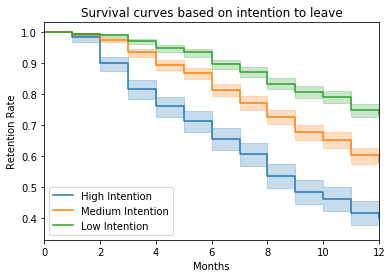

In [30]:
# calculate Kaplan-Meier survival estimates for the three categories and visualize these using survival curves
T = df_job['month']
E = df_job['left']
kmf = ll.KaplanMeierFitter()

# set up plot
survplot = plt.subplot()
kmf.fit(durations=T[high_int], event_observed=E[high_int], label="High Intention")
kmf.plot_survival_function(ax = survplot)
kmf.fit(durations=T[med_int], event_observed=E[med_int], label="Medium Intention")
kmf.plot_survival_function(ax = survplot)
kmf.fit(durations=T[low_int], event_observed=E[low_int], label="Low Intention")
kmf.plot_survival_function(ax = survplot)

plt.title('Survival curves based on intention to leave')
plt.ylabel('Retention Rate')
plt.xlabel('Months')
plt.show()

In [32]:
# Determine the effect of 'intention' on retention using a Cox proportional hazard model, controlling for 'gender','field'
from lifelines import CoxPHFitter

# fit Cox PH model to job_retention data
cph = CoxPHFitter()
cph.fit(df_job, duration_col = 'month', event_col = 'left', formula = "gender + field + level + intention")

# view results
cph.print_summary()

# intention is a significant input variable. 1 additional point of intention to leave increased odds of leaving by ~24% (all other variables being constant)

<lifelines.CoxPHFitter: fitted with 3770 total observations, 2416 right-censored observations>
             duration col = 'month'
                event col = 'left'
      baseline estimation = breslow
   number of observations = 3770
number of events observed = 1354
   partial log-likelihood = -10615.48
         time fit was run = 2021-08-26 14:43:54 UTC

---
                             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                          
field[T.Finance]             0.27       1.30       0.07             0.13             0.40                 1.14                 1.49
field[T.Health]              0.27       1.30       0.13             0.01             0.52                 1.01                 1.68
field[T.Law]                 0.09       1.10       0.15            -0.19             0.38                 0.83                 1.46
field[T.Public/Government]   0.15       1.16       0.09            -0.03             0.32                 0.97                 1.38
field[T.Sales/Marketing]     0.12       1.12       0.10            -0.08             0.32                 0.92                 1.37
gender[T.M]                  0.02       1.02       0.06            -0.10             0.14                 0.91                 1.15
intention                    0.22       1.24       0.01             0.19             0.24                 1.21                 1.27
level[T.Low]                 0.18       1.19       0.09             0.00             0.35                 1.00                 1.42
level[T.Medium]              0.12       1.13       0.10            -0.08             0.32                 0.92                 1.38

                               z      p   -log2(p)
covariate                                         
field[T.Finance]            3.98 <0.005      13.84
field[T.Health]             2.06   0.04       4.66
field[T.Law]                0.65   0.52       0.95
field[T.Public/Government]  1.65   0.10       3.33
field[T.Sales/Marketing]    1.15   0.25       2.01
gender[T.M]                 0.35   0.73       0.46
intention                  17.36 <0.005     221.85
level[T.Low]                1.97   0.05       4.35
level[T.Medium]             1.16   0.24       2.03
---
Concordance = 0.64
Partial AIC = 21248.96
log-likelihood ratio test = 307.26 on 9 df
-log2(p) of ll-ratio test = 199.72

In [39]:
# Perform check that the proportional hazard assumption holds for your model
# check Proportional Hazard assumptions
cph.check_assumptions(df_job[['month','left','gender','field','level','intention']], p_value_threshold = 0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 3770 total observations, 2416 right-censored observations>
         test_name = proportional_hazard_test

---
                                 test_statistic      p  -log2(p)
field[T.Finance]           km              1.57   0.21      2.25
                           rank            1.42   0.23      2.10
field[T.Health]            km              4.21   0.04      4.64
                           rank            4.03   0.04      4.48
field[T.Law]               km              1.28   0.26      1.95
                           rank            0.96   0.33      1.61
field[T.Public/Government] km              2.04   0.15      2.70
                           rank            1.96   0.16      2.63
field[T.Sales/Marketing]   km              2.42   0.12      3.06
                           rank            2.65   0.10      3.27
gender[T.M]                km              0.74   0.39      1.37
                           rank            0.70   0.40      1.31
intention                  km             34.16 <0.005     27.55
                           rank           32.93 <0.005     26.64
level[T.Low]               km              1.70   0.19      2.38
                           rank            1.71   0.19      2.39
level[T.Medium]            km              0.24   0.62      0.69
                           rank            0.31   0.58      0.79



1. Variable 'field[T.Health]' failed the non-proportional test: p-value is 0.0401.

   Advice: with so few unique values (only 2), you can include `strata=['field[T.Health]', ...]` in
the call in `.fit`. See documentation in link [E] below.

2. Variable 'intention' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'intention' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'intention' using pd.cut, and then specify it in
`strata=['intention', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.htm

[]